# Practice notebook for multivariate analysis using NHANES data

This notebook will give you the opportunity to perform some multivariate analyses on your own using the NHANES study data.  These analyses are similar to what was done in the week 3 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

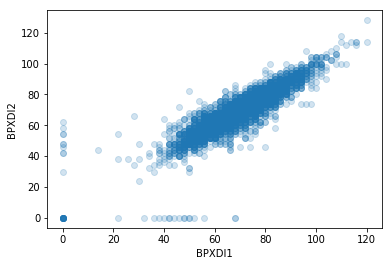

In [2]:
# enter your code here
sns.regplot(x="BPXDI1", y="BPXDI2", data=da, fit_reg=False, scatter_kws={"alpha": 0.2})

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


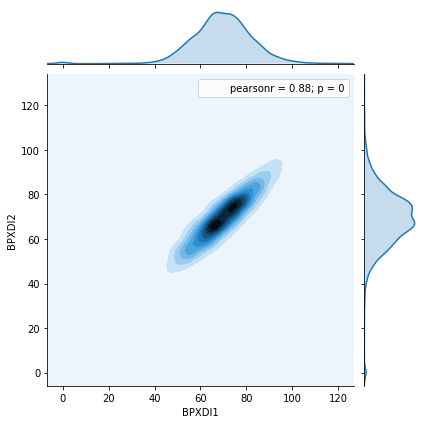

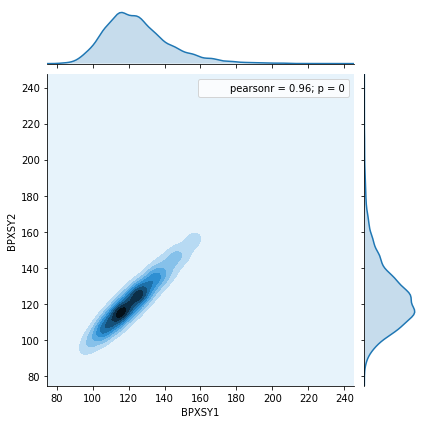

In [43]:
from scipy import stats
sns.jointplot(x="BPXDI1", y="BPXDI2", kind='kde', data=da).annotate(stats.pearsonr)

sns.jointplot(x="BPXSY1", y="BPXSY2", kind='kde', data=da).annotate(stats.pearsonr)

In [18]:
#  needed datum
# da.loc[:, ["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]].head()

da1 = da.loc[:, ["BPXSY1", "BPXSY2"]]

da.loc[:, ["BPXSY1", "BPXSY2"]].head()

,BPXSY1,BPXSY2
0,128.0,124.0
1,146.0,140.0
2,138.0,132.0
3,132.0,134.0
4,100.0,114.0


In [17]:
# 4 by 4 corr matrix btwn the first two systolic and the first two diastolic blood pressure measures
# "BPXSY1" for systolic and "BPXDI1" for diastolic pressures, resp.
da1.corr()

,BPXSY1,BPXSY2
BPXSY1,1.000000,0.962287
BPXSY2,0.962287,1.000000


In [20]:
da2 = da.loc[:, ["BPXDI1", "BPXDI2"]]

da.loc[:, ["BPXDI1", "BPXDI2"]].head()

,BPXDI1,BPXDI2
0,70.0,64.0
1,88.0,88.0
2,46.0,44.0
3,72.0,68.0
4,70.0,54.0


In [21]:
da2.corr()

,BPXDI1,BPXDI2
BPXDI1,1.000000,0.884722
BPXDI2,0.884722,1.000000


__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?

0.88

__Q2a.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

No the first ones have more correalation than that of second ones.

## Question 2

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


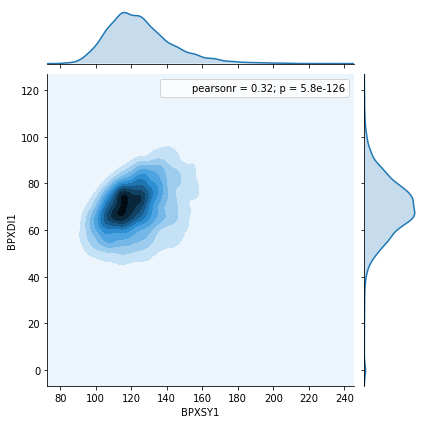

In [24]:
# construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.
sns.jointplot(x="BPXSY1", y="BPXDI1", kind='kde', data=da).annotate(stats.pearsonr)

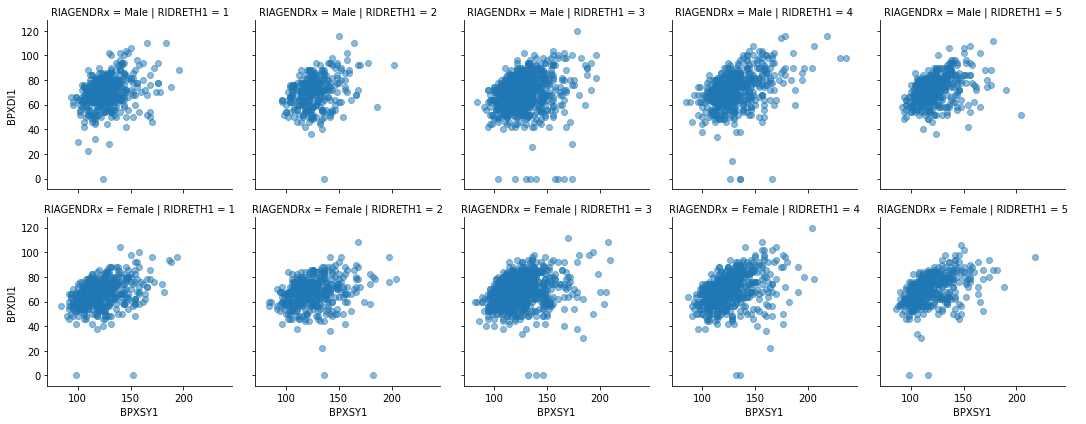

In [45]:
# stratify the plots by gender (rows) and by race/ethnicity groups (columns).
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"}) 
_ = sns.FacetGrid(da, col="RIDRETH1",  row="RIAGENDRx").map(plt.scatter, "BPXSY1", "BPXDI1", alpha=0.5).add_legend()

__Q3a.__ Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.

There seems to be a slight positive correlation between two blood pressures-across ethnicity. Among each ethnicity groups, gender really does not attribute the difference their correlations.

## Question 3

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

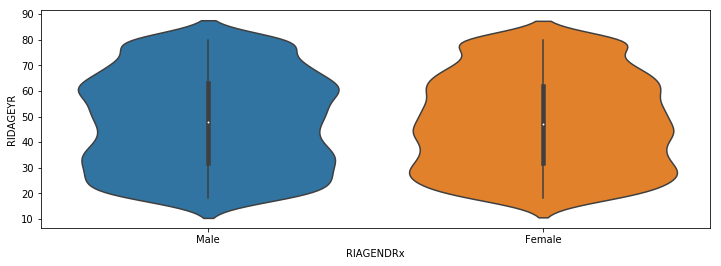

In [28]:
plt.figure(figsize=(12, 4))
sns.violinplot(da.RIAGENDRx, da.RIDAGEYR)

In [30]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})

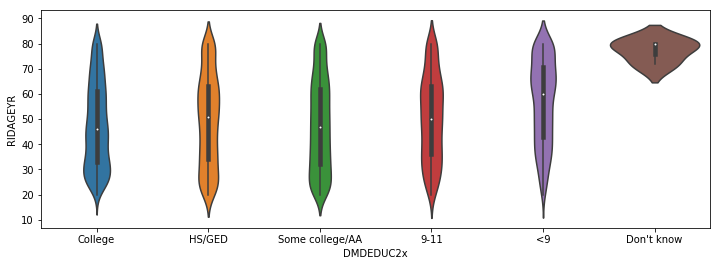

In [32]:
plt.figure(figsize=(12, 4))
sns.violinplot(da.DMDEDUC2x, da.RIDAGEYR)

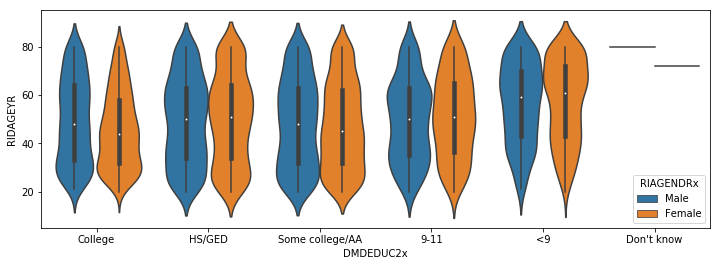

In [44]:
plt.figure(figsize = (12,4))
sns.violinplot(da.DMDEDUC2x, da.RIDAGEYR, da.RIAGENDRx)

__Q4a.__ Comment on any evident differences among the age distributions in the different demographic groups.

For gender: age-distribution has similar looks, except between ages: 40-60, male(incresing as yr increases) and female(decreasing as yr increases).

For education: statistically, younger people are more educated than the elders. Especially elders older than 65 answered as "Don't Know".

## Question 4

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

In [39]:
da["RIDAGEYR"].describe()

count    5735.000000
mean       48.052310
std        18.431011
min        18.000000
25%        32.000000
50%        48.000000
75%        63.000000
max        80.000000
Name: RIDAGEYR, dtype: float64

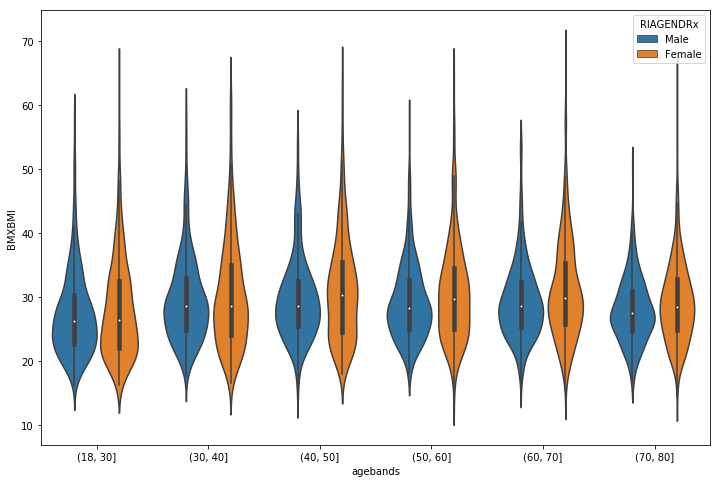

In [41]:
da["agebands"] = pd.cut(da.RIDAGEYR, [18,30,40,50,60,70,80])

plt.figure(figsize = (12,8))
BMI_by_age_gender = sns.violinplot(x = da.agebands, y = da.BMXBMI, hue = da.RIAGENDRx )

# how to change this "agebands" label into "age bands"?

__Q5a.__ Comment on the trends in BMI across the demographic groups.

Across all age bands, Female has higher BMI than Male's BMI. Their median is slightly higher than that of Male. Also thier IQR is also slightly larger than that of Male within the same age bands. Especially, Female outliers w/ max BMI's within each age band has much higher BMI's than Male's max BMI across all age bands.

## Question 5

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [47]:
da["RIDRETH1"].describe()

count    5735.000000
mean        3.042371
std         1.296793
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: RIDRETH1, dtype: float64

In [50]:
da['HIQ210'].describe()

count    4732.000000
mean        1.915469
std         0.414845
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         9.000000
Name: HIQ210, dtype: float64

In [51]:
da["RIDRETH1x"] = da.RIDRETH1.replace({1: "Mexican American", 2: "Other Hispanic", 3: "Non-Hispanic White", 
                                      4: "Non-Hispanic Black", 5: "Other Race - Including Multi-Racial"})
da["HIQ210x"] = da.HIQ210.replace({1: "Yes", 2: "No", 7: "Refused", 9: "Don't Know"})
da["HIQ210x"].fillna("Missing", inplace = True)

freq_table = pd.crosstab(da.RIDRETH1x, da.HIQ210x)
freq_table.apply(lambda z: z/z.sum(), axis = 1)

HIQ210x,Don't Know,Missing,No,Yes
RIDRETH1x,,,,
Mexican American,0.002947,0.337917,0.567780,0.091356
Non-Hispanic Black,0.000815,0.152404,0.754686,0.092095
Non-Hispanic White,0.001088,0.103861,0.834693,0.060359
Other Hispanic,0.000000,0.233333,0.668000,0.098667
Other Race - Including Multi-Racial,0.002220,0.117647,0.807991,0.072142


In [52]:
freq_table.apply(lambda z: z/z.sum(), axis = 0)

HIQ210x,Don't Know,Missing,No,Yes
RIDRETH1x,,,,
Mexican American,0.375,0.342971,0.135426,0.203947
Non-Hispanic Black,0.125,0.186441,0.216963,0.247807
Non-Hispanic White,0.250,0.190429,0.359653,0.243421
Other Hispanic,0.000,0.174477,0.117385,0.162281
Other Race - Including Multi-Racial,0.250,0.105683,0.170572,0.142544


__Q6a.__ Which ethnic group has the highest rate of being uninsured in the past year?

Non-Hispanic white has the highest rate.